In [3]:
import zipfile

In [5]:
import os

In [7]:
zip_file = "sign.zip"

In [9]:
extract_to = "sign_dataset"

In [11]:
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [13]:
print(f"Dataset extracted to: {extract_to}")

Dataset extracted to: sign_dataset


In [15]:
dataset_path = "sign_dataset" 
files = os.listdir(dataset_path)

print(f"Files in the dataset: {files}")


Files in the dataset: ['sign']


In [21]:
!pip install opencv-python-headless



   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.4 MB ? eta -:--:--
    --------------------------------------- 0.8/39.4 MB 1.7 MB/s eta 0:00:24
   - -------------------------------------- 1.6/39.4 MB 2.3 MB/s eta 0:00:17
   - -------------------------------------- 1.8/39.4 MB 2.0 MB/s eta 0:00:20
   -- ------------------------------------- 2.6/39.4 MB 2.4 MB/s eta 0:00:16
   --- ------------------------------------ 3.1/39.4 MB 2.4 MB/s eta 0:00:16
   --- ------------------------------------ 3.4/39.4 MB 2.2 MB/s eta 0:00:17
   --- ------------------------------------ 3.9/39.4 MB 2.3 MB/s eta 0:00:16
   ---- ----------------------------------- 4.5/39.4 MB 2.3 MB/s eta 0:00:16
   ---- ----------------------------------- 4.7/39.4 MB 2.3 MB/s eta 0:00:15
   ----- ---------------------------------- 5.5/39.4 MB 2.3 MB/s eta 0:00:15
   ------ ----------

In [30]:
image_folder = "sign_dataset/sign"




In [32]:
import os

# List all image files in the 'sign' folder
images = [file for file in os.listdir(image_folder) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]
print(f"Image files in '{image_folder}': {images}")


Image files in 'sign_dataset/sign': ['signature (1).jpg', 'signature (10).jpg', 'signature (11).jpg', 'signature (12).jpg', 'signature (13).jpg', 'signature (14).jpg', 'signature (15).jpg', 'signature (16).jpg', 'signature (17).jpg', 'signature (18).jpg', 'signature (19).jpg', 'signature (2).jpg', 'signature (20).jpg', 'signature (21).jpg', 'signature (22).jpg', 'signature (23).jpg', 'signature (24).jpg', 'signature (25).jpg', 'signature (3).jpg', 'signature (4).jpg', 'signature (5).jpg', 'signature (6).jpg', 'signature (7).jpg', 'signature (8).jpg', 'signature (9).jpg']


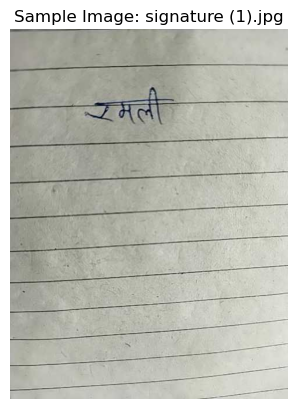

In [38]:
import cv2
from matplotlib import pyplot as plt

# Select an image file to display
sample_image_path = f"{image_folder}/signature (1).jpg"

# Read and display the image
image = cv2.imread(sample_image_path)
if image is None:
    print(f"Failed to load image: {sample_image_path}")
else:
    # Convert BGR to RGB for Matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
    plt.title("Sample Image: signature (1).jpg")
    plt.show()


In [48]:
!pip install labelImg



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for labelImg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261580 sha256=26fe4c877d21e45244d4f44250ef7969ac1f6e38b30d795038f672c60f26f325
  Stored in directory: c:\users\anuja\appdata\local\pip\cache\wheels\e6\1c\26\d1b603062180ce80890567fb7e1e837db08bdea938aaea77f3
Successfully built labelImg


In [1]:
!pip show labelImg



Name: labelImg
Version: 1.8.6
Summary: LabelImg is a graphical image annotation tool and label object bounding boxes in images
Home-page: https://github.com/tzutalin/labelImg
Author: TzuTa Lin
Author-email: tzu.ta.lin@gmail.com
License: MIT license
Location: C:\Users\anuja\anaconda3\Lib\site-packages
Requires: lxml, pyqt5
Required-by: 


In [3]:
!labelImg



In [28]:
!start labelImg



In [30]:
pip install albumentations opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.5 MB 6.3 MB/s eta 0:00:07
   -- ------------------------------------- 2.1/39.5 MB 5.3 MB/s eta 0:00:07
   --- ------------------------------------ 3.1/39.5 MB 5.3 MB/s eta 0:00:07
   ---- ----------------------------------- 4.2/39.5 MB 5.1 MB/s eta 0:00:07
   ----- ---------------------------------- 5.0/39.5 MB 5.2 MB/s eta 0:00:07
   ----- ---------------------------------- 5.5/39.5 MB 4.7 MB/s eta 0:00:08
   ------ --------------------------------- 6.0/39.5 MB 4.4 MB/s eta 0:00:08
   ------ --------------------------------- 6.8/39.5 MB 4.1 MB/s eta 0:00:08
   ------- -------------------------------- 7.3/39.5 MB 4.0 MB/s eta 0:00:09
   -------- ------------------------------- 8.1/39.5 MB 4.0 MB/s eta 0:00:08
   --------- ------------------------------ 8.9/39.5 MB 4.0 MB/s eta 0:00:08
   --------- ------------------------------ 9.4/39.5 MB 3.9 MB/s eta 0:00:08
   ---

In [32]:
import cv2
import os
import albumentations as A
from xml.etree.ElementTree import Element, SubElement, ElementTree, parse
import numpy as np

# Define augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=30, p=0.5),
    A.RandomCrop(width=500, height=500, p=0.5)
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']))

# Function to parse and update XML annotations
def parse_and_update_xml(xml_file, image_shape, bboxes, labels):
    tree = parse(xml_file)
    root = tree.getroot()
    
    size = root.find('size')
    size.find('width').text = str(image_shape[1])
    size.find('height').text = str(image_shape[0])
    
    for obj in root.findall('object'):
        root.remove(obj)
    
    for bbox, label in zip(bboxes, labels):
        obj = SubElement(root, 'object')
        name = SubElement(obj, 'name')
        name.text = label
        
        bndbox = SubElement(obj, 'bndbox')
        SubElement(bndbox, 'xmin').text = str(int(bbox[0]))
        SubElement(bndbox, 'ymin').text = str(int(bbox[1]))
        SubElement(bndbox, 'xmax').text = str(int(bbox[2]))
        SubElement(bndbox, 'ymax').text = str(int(bbox[3]))
    
    return tree

# Augment dataset
def augment_dataset(image_dir, annotation_dir, output_dir):
    os.makedirs(output_dir + '/images', exist_ok=True)
    os.makedirs(output_dir + '/annotations', exist_ok=True)
    
    for image_file in os.listdir(image_dir):
        if not image_file.endswith('.jpg'):
            continue
        
        image_path = os.path.join(image_dir, image_file)
        xml_path = os.path.join(annotation_dir, image_file.replace('.jpg', '.xml'))
        
        # Load image and annotations
        image = cv2.imread(image_path)
        tree = parse(xml_path)
        root = tree.getroot()
        
        bboxes = []
        labels = []
        for obj in root.findall('object'):
            label = obj.find('name').text
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)
            bboxes.append([xmin, ymin, xmax, ymax])
            labels.append(label)
        
        # Apply augmentation
        augmented = augmentations(image=image, bboxes=bboxes, category_ids=labels)
        aug_image = augmented['image']
        aug_bboxes = augmented['bboxes']
        aug_labels = augmented['category_ids']
        
        # Save augmented image and annotation
        output_image_path = os.path.join(output_dir + '/images', 'aug_' + image_file)
        output_xml_path = os.path.join(output_dir + '/annotations', 'aug_' + image_file.replace('.jpg', '.xml'))
        
        cv2.imwrite(output_image_path, aug_image)
        tree = parse_and_update_xml(xml_path, aug_image.shape, aug_bboxes, aug_labels)
        tree.write(output_xml_path)

# Specify directories
image_dir = "sign_dataset/sign"  # Path to your images
annotation_dir = "sign_dataset/annotations"  # Path to your XML annotations
output_dir = "augmented_dataset"  # Directory for augmented data

augment_dataset(image_dir, annotation_dir, output_dir)


FileNotFoundError: [Errno 2] No such file or directory: 'sign_dataset/annotations\\signature (1).xml'

In [42]:
image_dir = "sign_dataset"  # Path to your folder containing both images and XML files
annotation_dir = image_dir  # Same as image_dir since XML files are in the same folder
output_dir = "augmented_dataset"  # Directory for augmented data


In [44]:
for image_file in os.listdir(image_dir):
    if not image_file.endswith('.jpg'):
        continue
    
    image_path = os.path.join(image_dir, image_file)
    xml_path = os.path.join(annotation_dir, image_file.replace('.jpg', '.xml'))
    
    if not os.path.exists(xml_path):
        print(f"Annotation file not found for {image_file}. Skipping...")
        continue
    
    # Proceed with loading the image and annotation


In [46]:
import os
import cv2
from xml.etree.ElementTree import parse
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Define augmentations
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=30, p=0.5),
    A.Blur(blur_limit=3, p=0.2),
    A.Resize(512, 512),
    ToTensorV2(),
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']))

def augment_dataset(image_dir, output_dir):
    os.makedirs(output_dir + '/images', exist_ok=True)
    os.makedirs(output_dir + '/annotations', exist_ok=True)

    for image_file in os.listdir(image_dir):
        if not image_file.endswith('.jpg'):
            continue

        image_path = os.path.join(image_dir, image_file)
        xml_path = os.path.join(image_dir, image_file.replace('.jpg', '.xml'))

        if not os.path.exists(xml_path):
            print(f"Annotation file not found for {image_file}. Skipping...")
            continue

        # Load image
        image = cv2.imread(image_path)
        
        # Parse annotation
        tree = parse(xml_path)
        root = tree.getroot()

        bboxes = []
        labels = []
        for obj in root.findall('object'):
            label = obj.find('name').text
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)
            bboxes.append([xmin, ymin, xmax, ymax])
            labels.append(label)

        # Apply augmentations
        augmented = augmentations(image=image, bboxes=bboxes, category_ids=labels)
        aug_image = augmented['image']
        aug_bboxes = augmented['bboxes']
        aug_labels = augmented['category_ids']

        # Save augmented image
        output_image_path = os.path.join(output_dir + '/images', 'aug_' + image_file)
        cv2.imwrite(output_image_path, aug_image)

        # Save updated annotations
        output_xml_path = os.path.join(output_dir + '/annotations', 'aug_' + image_file.replace('.jpg', '.xml'))
        tree = parse_and_update_xml(xml_path, aug_image.shape, aug_bboxes, aug_labels)
        tree.write(output_xml_path)

# Ensure to define parse_and_update_xml function if you haven't already

# Set paths
image_dir = "sign_dataset"  # Folder containing images and XMLs
output_dir = "augmented_dataset"  # Folder for saving augmented data

# Run augmentation
augment_dataset(image_dir, output_dir)


ModuleNotFoundError: No module named 'torch'

In [49]:
!pip install torch

In [51]:
import os
import cv2
from xml.etree.ElementTree import parse
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Define augmentations
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=30, p=0.5),
    A.Blur(blur_limit=3, p=0.2),
    A.Resize(512, 512),
    ToTensorV2(),
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']))

def augment_dataset(image_dir, output_dir):
    os.makedirs(output_dir + '/images', exist_ok=True)
    os.makedirs(output_dir + '/annotations', exist_ok=True)

    for image_file in os.listdir(image_dir):
        if not image_file.endswith('.jpg'):
            continue

        image_path = os.path.join(image_dir, image_file)
        xml_path = os.path.join(image_dir, image_file.replace('.jpg', '.xml'))

        if not os.path.exists(xml_path):
            print(f"Annotation file not found for {image_file}. Skipping...")
            continue

        # Load image
        image = cv2.imread(image_path)
        
        # Parse annotation
        tree = parse(xml_path)
        root = tree.getroot()

        bboxes = []
        labels = []
        for obj in root.findall('object'):
            label = obj.find('name').text
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)
            bboxes.append([xmin, ymin, xmax, ymax])
            labels.append(label)

        # Apply augmentations
        augmented = augmentations(image=image, bboxes=bboxes, category_ids=labels)
        aug_image = augmented['image']
        aug_bboxes = augmented['bboxes']
        aug_labels = augmented['category_ids']

        # Save augmented image
        output_image_path = os.path.join(output_dir + '/images', 'aug_' + image_file)
        cv2.imwrite(output_image_path, aug_image)

        # Save updated annotations
        output_xml_path = os.path.join(output_dir + '/annotations', 'aug_' + image_file.replace('.jpg', '.xml'))
        tree = parse_and_update_xml(xml_path, aug_image.shape, aug_bboxes, aug_labels)
        tree.write(output_xml_path)

# Ensure to define parse_and_update_xml function if you haven't already

# Set paths
image_dir = "sign_dataset"  # Folder containing images and XMLs
output_dir = "augmented_dataset"  # Folder for saving augmented data

# Run augmentation
augment_dataset(image_dir, output_dir)


In [53]:
!pip install ultralytics


   ---------------------------------------- 0.0/913.5 kB ? eta -:--:--
   ---------------------------------------- 913.5/913.5 kB 4.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -------------------------- ------------- 1.0/1.6 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 4.9 MB/s eta 0:00:00


In [55]:
from ultralytics import YOLO

# Load the YOLO model
model = YOLO('yolov8n.pt')  # Replace with 'yolov8s.pt', 'yolov8m.pt', etc., for larger models

# Train the model
model.train(data='path/to/data.yaml', epochs=50, imgsz=640)


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\anuja\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:01<00:00, 4.32MB/s]


Ultralytics 8.3.67  Python-3.12.7 torch-2.5.1+cpu CPU (AMD Ryzen 7 7730U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=path/to/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

RuntimeError: Dataset 'path/to/data.yaml' error  'path/to/data.yaml' does not exist

In [62]:
import os
import cv2
import xml.etree.ElementTree as ET

def convert_xml_to_yolo_format(xml_file, image_file, output_file):
    """
    Convert XML annotations to YOLO format.
    """
    # Parse XML
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Load image to get its dimensions
    image = cv2.imread(image_file)
    height, width, _ = image.shape

    # Open the output .txt file to write
    with open(output_file, "w") as f:
        for obj in root.findall("object"):
            # Extract class name, assuming it is 'signature' (class 0)
            class_name = obj.find("name").text
            class_id = 0  # Since you have one class 'signature'

            # Get bounding box information
            bndbox = obj.find("bndbox")
            xmin = int(bndbox.find("xmin").text)
            ymin = int(bndbox.find("ymin").text)
            xmax = int(bndbox.find("xmax").text)
            ymax = int(bndbox.find("ymax").text)

            # Convert to YOLO format (normalized coordinates)
            x_center = (xmin + xmax) / 2.0 / width
            y_center = (ymin + ymax) / 2.0 / height
            box_width = (xmax - xmin) / float(width)
            box_height = (ymax - ymin) / float(height)

            # Write to the .txt file
            f.write(f"{class_id} {x_center} {y_center} {box_width} {box_height}\n")

def convert_annotations(xml_dir, img_dir, output_dir):
    """
    Convert all XML annotations in the directory to YOLO format and save in output directory.
    """
    # Ensure output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop through all XML files and convert them
    for xml_file in os.listdir(xml_dir):
        if xml_file.endswith(".xml"):
            # Get corresponding image file
            image_name = xml_file.replace(".xml", ".jpg")
            xml_path = os.path.join(xml_dir, xml_file)
            image_path = os.path.join(img_dir, image_name)

            # Define the output label file path
            output_file = os.path.join(output_dir, image_name.replace(".jpg", ".txt"))

            # Convert the XML file to YOLO format
            convert_xml_to_yolo_format(xml_path, image_path, output_file)

# Paths to directories
xml_dir = "sign_dataset/sign/"  # Directory containing XML files (directly below sign_dataset/sign/)
img_dir = "sign_dataset/sign/"  # Directory containing JPG files
output_train_dir = "sign_dataset/labels/train/"  # Output for train labels
output_val_dir = "sign_dataset/labels/val/"      # Output for validation labels

# Convert annotations for training and validation sets
convert_annotations(xml_dir, img_dir, output_train_dir)
convert_annotations(xml_dir, img_dir, output_val_dir)





AttributeError: 'NoneType' object has no attribute 'shape'